### **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import PIL

In [2]:
# Loading files from tensorflow

url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar=True)

In [3]:
# Import PathLib to convert the path to the windows type
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
# Analyzing the number of photos
img_num = len(list(data_dir.glob('*/*.jpg')))

print(f"We've a total of {img_num} images in this dataset")

We've a total of 3670 images in this dataset


In [5]:
# Testing Glob Searching

print(len(list(data_dir.glob("daisy/*"))))
daisy_flowers = list(data_dir.glob("daisy/*"))[:5]
daisy_flowers

633


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

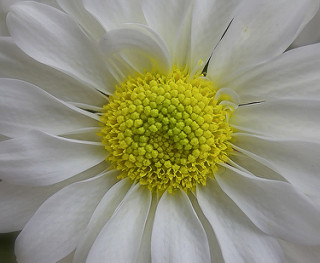

In [6]:
PIL.Image.open(daisy_flowers[0])

In [7]:
# Making dictonary of flower categories

img_flowers = {
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "roses": list(data_dir.glob("roses/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*"))
}

In [8]:
label_flowers = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4
}

In [15]:
# Organizing the datafor X and Y
X, y = [], []

# total_width = 0
# total_height = 0

# for images in img_flowers.values():
#     for image in images:
#         with PIL.Image.open(image) as img:
#             width, height = img.size            
#             total_width += width
#             total_height += height

# avg_width = round(total_width/img_num)
# avg_height = round(total_height/img_num)

for name, images in img_flowers.items():
    for image in images:
        img = cv2.imread(str(image))
        img_resize = cv2.resize(img, (256, 256))
        X.append(img_resize)
        y.append(label_flowers[name])
        

In [16]:
# Convert to numpy array
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, shuffle=True)

In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

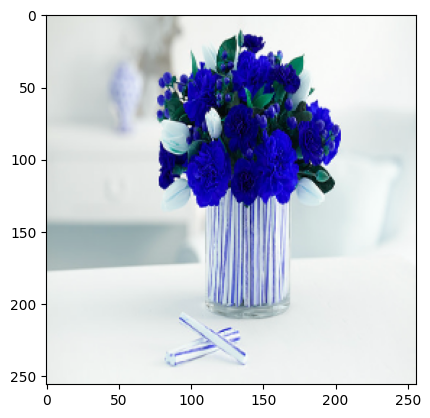

In [19]:
plt.imshow(X_train[0])

In [20]:
num_classes = len(label_flowers)

cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [21]:
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 11s 61ms/step - loss: 1.4682 - accuracy: 0.4281
Epoch 2/10
86/86 [==============================] - 5s 62ms/step - loss: 0.9981 - accuracy: 0.5974
Epoch 3/10
86/86 [==============================] - 5s 61ms/step - loss: 0.7684 - accuracy: 0.7129
Epoch 4/10
86/86 [==============================] - 5s 60ms/step - loss: 0.5223 - accuracy: 0.8212
Epoch 5/10
86/86 [==============================] - 5s 60ms/step - loss: 0.2993 - accuracy: 0.8990
Epoch 6/10
86/86 [==============================] - 5s 60ms/step - loss: 0.1641 - accuracy: 0.9509
Epoch 7/10
86/86 [==============================] - 5s 61ms/step - loss: 0.1391 - accuracy: 0.9568
Epoch 8/10
86/86 [==============================] - 5s 62ms/step - loss: 0.0717 - accuracy: 0.9804
Epoch 9/10
86/86 [==============================] - 5s 62ms/step - loss: 0.0241 - accuracy: 0.9953
Epoch 10/10
86/86 [==============================] - 5s 60ms/step - loss: 0.0482 - accuracy: 0.9876


In [23]:
cnn.evaluate(X_test_scaled, y_test)
# Getting Overfitting

29/29 [==============================] - 1s 34ms/step - loss: 2.2535 - accuracy: 0.5675


[2.2534849643707275, 0.5675381422042847]

In [26]:
data_augmentation = keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    keras.layers.experimental.preprocessing.RandomZoom(.2)
])


In [34]:
cnn_augmentation = keras.Sequential([
    data_augmentation,

    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(.3),

    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(.3),

    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(.3),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
    
])

cnn_augmentation.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
cnn_augmentation.fit(X_train_scaled, y_train, epochs=30)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
cnn_augmentation.evaluate(X_test_scaled, y_test)


29/29 [==============================] - 1s 31ms/step - loss: 1.4703 - accuracy: 0.7135


[1.4702906608581543, 0.7135076522827148]